## Librerias necesarias

In [89]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
from scipy.stats.stats import pearsonr  
from sklearn.cluster import KMeans
from scipy.cluster.vq import kmeans,vq
from scipy.spatial.distance import cdist


## K-Means Clustering

La data de los diferentes paises del mundo tiene como variables los siguientes indicadores.
<table><tr><th>country</th><td>Nombre del país</td></tr>
<tr><th>region</th><td>Continente al que pertenece</td></tr>
<tr><th>tfr</th><td>Ratio de fertilidad</td></tr>
<tr><th>contraception</th><td>% de la población que usa anticonceptivos</td></tr>
<tr><th>educationMale</th><td>% de la población masculina educada</td></tr>
<tr><th>educationFemale</th><td>% de la población femenina educada</td></tr>
<tr><th>lifeMale</th><td>Esperanza de vida de los hombres</td></tr>
<tr><th>lifeFemale</th><td>Esperanza de vida de las mujeres</td></tr>
<tr><th>infantMortality</th><td>Ratio de mortalidad infantil</td></tr>
<tr><th>GDPperCapita</th><td>PBI</td></tr>
<tr><th>economicActivityMale</th><td>Hombres en la PEA</td></tr>
<tr><th>economicActivityFemale</th><td>Mujeres en la PEA</td></tr>
<tr><th>illiteracyMale</th><td>Ratio de analfabetismo en hombres</td></tr>
<tr><th>illiteracyFemale</th><td>Ratio de analfabetismo en mujeres</td></tr>
</table>

In [90]:
data = pd.read_csv('UN.csv')
data.head()

,country,region,tfr,contraception,educationMale,educationFemale,lifeMale,lifeFemale,infantMortality,GDPperCapita,economicActivityMale,economicActivityFemale,illiteracyMale,illiteracyFemale
0,Afghanistan,Asia,6.90,NaN,NaN,NaN,45.0,46.0,154.0,2848.0,87.5,7.2,52.800,85.00
1,Albania,Europe,2.60,NaN,NaN,NaN,68.0,74.0,32.0,863.0,NaN,NaN,NaN,NaN
2,Algeria,Africa,3.81,52.0,11.1,9.9,67.5,70.3,44.0,1531.0,76.4,7.8,26.100,51.00
3,American.Samoa,Asia,NaN,NaN,NaN,NaN,68.0,73.0,11.0,NaN,58.8,42.4,0.264,0.36
4,Andorra,Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
type(data)

pandas.core.frame.DataFrame

In [92]:
data.columns

Index(['country', 'region', 'tfr', 'contraception', 'educationMale',
       'educationFemale', 'lifeMale', 'lifeFemale', 'infantMortality',
       'GDPperCapita', 'economicActivityMale', 'economicActivityFemale',
       'illiteracyMale', 'illiteracyFemale'],
      dtype='object')

In [5]:
data['country'][0]

'Afghanistan'

In [93]:
data[0:1]['country']

0    Afghanistan
Name: country, dtype: object

In [94]:
type(data[0:1]['country'])

pandas.core.series.Series

In [8]:
type(data['country'][0])

str

In [95]:
print('Estructura de los datos')
[(col, type(data[col][0])) for col in data.columns] 

Estructura de los datos


[('country', str),
 ('region', str),
 ('tfr', numpy.float64),
 ('contraception', numpy.float64),
 ('educationMale', numpy.float64),
 ('educationFemale', numpy.float64),
 ('lifeMale', numpy.float64),
 ('lifeFemale', numpy.float64),
 ('infantMortality', numpy.float64),
 ('GDPperCapita', numpy.float64),
 ('economicActivityMale', numpy.float64),
 ('economicActivityFemale', numpy.float64),
 ('illiteracyMale', numpy.float64),
 ('illiteracyFemale', numpy.float64)]

% de missings por variables

In [96]:
data.shape

(207, 14)

In [97]:
data.count(0)

country                   207
region                    207
tfr                       197
contraception             144
educationMale              76
educationFemale            76
lifeMale                  196
lifeFemale                196
infantMortality           201
GDPperCapita              197
economicActivityMale      165
economicActivityFemale    165
illiteracyMale            160
illiteracyFemale          160
dtype: int64

In [98]:
print('% de poblamiento de las variables')
data.count(0)/data.shape[0] * 100

% de poblamiento de las variables


country                   100.000000
region                    100.000000
tfr                        95.169082
contraception              69.565217
educationMale              36.714976
educationFemale            36.714976
lifeMale                   94.685990
lifeFemale                 94.685990
infantMortality            97.101449
GDPperCapita               95.169082
economicActivityMale       79.710145
economicActivityFemale     79.710145
illiteracyMale             77.294686
illiteracyFemale           77.294686
dtype: float64

Vamos a considerar a todas las variables que superen el 50% de información completa.

In [99]:
df = data[['tfr','contraception','lifeMale', 'lifeFemale', 'infantMortality', 'GDPperCapita','economicActivityMale','economicActivityFemale','illiteracyMale','illiteracyFemale']]
df = df.dropna(how='any')

In [101]:
df.shape

(97, 10)

In [17]:
df[:10]

,tfr,contraception,lifeMale,lifeFemale,infantMortality,GDPperCapita,economicActivityMale,economicActivityFemale,illiteracyMale,illiteracyFemale
2,3.81,52.0,67.5,70.3,44.0,1531.0,76.4,7.8,26.100,51.000
8,1.70,22.0,67.2,74.0,25.0,354.0,65.0,52.0,0.300,0.500
12,1.95,62.0,70.5,77.1,14.0,12545.0,81.2,67.0,1.500,2.000
13,2.97,53.0,71.1,75.3,18.0,9073.0,88.2,29.2,10.900,20.600
14,3.14,49.0,58.1,58.2,78.0,280.0,88.8,55.9,50.600,73.900
15,1.73,55.0,73.6,78.7,9.0,7173.0,73.4,61.4,2.000,3.200
16,1.40,50.0,64.4,74.8,15.0,994.0,76.4,61.3,0.300,0.600
18,3.66,47.0,73.4,76.1,30.0,2569.0,79.0,34.0,21.252,23.472
19,5.83,16.0,52.4,57.2,84.0,391.0,90.0,57.8,51.300,74.200
21,4.36,45.0,59.8,63.2,66.0,909.0,74.1,56.3,9.500,24.000


### Analizar la relación entre las variables

In [102]:
matrix_correlations_paises=df.corr()
matrix_correlations_paises

,tfr,contraception,lifeMale,lifeFemale,infantMortality,GDPperCapita,economicActivityMale,economicActivityFemale,illiteracyMale,illiteracyFemale
tfr,1.000000,-0.700416,-0.732188,-0.825177,0.820365,-0.371675,0.383166,-0.164210,0.729894,0.759104
contraception,-0.700416,1.000000,0.684806,0.683828,-0.686826,0.342377,-0.187386,0.019584,-0.557717,-0.562519
lifeMale,-0.732188,0.684806,1.000000,0.965744,-0.873587,0.483363,-0.197267,-0.217249,-0.630533,-0.667473
lifeFemale,-0.825177,0.683828,0.965744,1.000000,-0.923671,0.469520,-0.278806,-0.110261,-0.720828,-0.770696
infantMortality,0.820365,-0.686826,-0.873587,-0.923671,1.000000,-0.446811,0.292581,0.072473,0.738038,0.793417
GDPperCapita,-0.371675,0.342377,0.483363,0.469520,-0.446811,1.000000,-0.129578,-0.040779,-0.280243,-0.281056
economicActivityMale,0.383166,-0.187386,-0.197267,-0.278806,0.292581,-0.129578,1.000000,0.135534,0.425205,0.379959
economicActivityFemale,-0.164210,0.019584,-0.217249,-0.110261,0.072473,-0.040779,0.135534,1.000000,-0.119927,-0.175309
illiteracyMale,0.729894,-0.557717,-0.630533,-0.720828,0.738038,-0.280243,0.425205,-0.119927,1.000000,0.961777
illiteracyFemale,0.759104,-0.562519,-0.667473,-0.770696,0.793417,-0.281056,0.379959,-0.175309,0.961777,1.000000


In [19]:
matrix_correlations_paises.to_csv('matrix_correlations_paises.csv')

### Reducir el número de dimensiones de los datos con PCA

In [103]:
pc_toarray = df.values
pc_toarray

array([[  3.81000000e+00,   5.20000000e+01,   6.75000000e+01,
          7.03000000e+01,   4.40000000e+01,   1.53100000e+03,
          7.64000000e+01,   7.80000000e+00,   2.61000000e+01,
          5.10000000e+01],
       [  1.70000000e+00,   2.20000000e+01,   6.72000000e+01,
          7.40000000e+01,   2.50000000e+01,   3.54000000e+02,
          6.50000000e+01,   5.20000000e+01,   3.00000000e-01,
          5.00000000e-01],
       [  1.95000000e+00,   6.20000000e+01,   7.05000000e+01,
          7.71000000e+01,   1.40000000e+01,   1.25450000e+04,
          8.12000000e+01,   6.70000000e+01,   1.50000000e+00,
          2.00000000e+00],
       [  2.97000000e+00,   5.30000000e+01,   7.11000000e+01,
          7.53000000e+01,   1.80000000e+01,   9.07300000e+03,
          8.82000000e+01,   2.92000000e+01,   1.09000000e+01,
          2.06000000e+01],
       [  3.14000000e+00,   4.90000000e+01,   5.81000000e+01,
          5.82000000e+01,   7.80000000e+01,   2.80000000e+02,
          8.88000000e+01

In [104]:
from sklearn.preprocessing import scale

#Scaling the values
pc_toarray = scale(pc_toarray)

In [105]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

In [106]:
hpc = PCA(n_components=10).fit(pc_toarray)
hpc

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [108]:
hpc.explained_variance_ratio_

array([ 0.58858332,  0.12418127,  0.10245655,  0.07403812,  0.04929412,
        0.03151779,  0.014864  ,  0.01084343,  0.00283283,  0.00138858])

In [109]:
#Cumulative Variance explains
var1=np.cumsum(np.round(hpc.explained_variance_ratio_, decimals=4)*100)
var1

array([  58.86,   71.28,   81.53,   88.93,   93.86,   97.01,   98.5 ,
         99.58,   99.86,  100.  ])

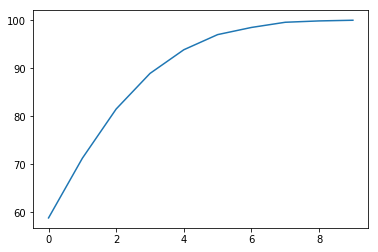

In [110]:
plt.plot(var1)

In [111]:
hpc = PCA(n_components=4).fit_transform(pc_toarray)
hpc

array([[ 0.32358057,  2.25063269,  0.62161949, -0.79845776],
       [-1.55687058, -1.04107824,  1.83553096,  0.11374063],
       [-2.51605611, -0.76838707, -1.53678834,  0.93469974],
       [-1.30901434,  1.3048037 , -1.47195555, -0.34722548],
       [ 2.6921884 , -0.10576982, -1.68464323, -0.3780492 ],
       [-2.69026797, -0.67930794, -0.24490005,  0.41662681],
       [-1.81745162, -1.44822807,  0.07688711, -0.46309752],
       [-0.76908909,  1.00459886, -0.21891918, -0.70637815],
       [ 4.22832876, -0.15657465, -1.42472951, -0.05562593],
       [ 0.74051818, -1.01540218,  0.60311004,  0.09570697],
       [ 2.1174244 , -0.3753875 ,  0.78916673,  0.70741163],
       [-0.85419482, -0.50955479, -1.21304202, -0.34655825],
       [ 6.02418873, -1.11475333, -1.67119533,  0.74673303],
       [ 5.51210145, -2.10640044, -1.74782407,  0.74718066],
       [ 3.74573886, -1.68117357, -0.8319057 ,  0.26054203],
       [-1.8206533 ,  0.53130251,  0.42326161, -0.23790696],
       [-1.17136226, -1.

### Para determinar el número de clusters

Nos da una idea de la cantidad de clusters que nos permitirán segmentar nuestros datos.

In [112]:
# Determine your k range
k_range = range(1,20)

# Fit the kmeans model for each n_clusters = k
k_means_var = [KMeans(n_clusters=k).fit(hpc) for k in k_range]
k_means_var

[KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=1, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max

In [113]:
# Pull out the cluster centers for each model
centroids = [X.cluster_centers_ for X in k_means_var]
centroids

[array([[ -5.49388713e-17,   9.15647855e-17,   5.72279910e-18,
          -9.29954853e-18]]),
 array([[-1.29901664, -0.0224291 , -0.01931832, -0.11335694],
        [ 3.36782091,  0.05814952,  0.05008453,  0.29388836]]),
 array([[ 0.06712576,  0.43186864, -0.02561476, -0.48278955],
        [ 3.93036608,  0.02851276, -0.06671445,  0.36737117],
        [-1.97099622, -0.34535891,  0.05223931,  0.19109908]]),
 array([[-1.2988786 , -0.4489298 ,  0.08646072, -0.42363256],
        [ 4.43202336, -0.40459257, -0.39566697,  0.41219957],
        [ 1.28569665,  0.87504961,  0.49488955, -0.20808831],
        [-2.70162532,  0.6972023 , -0.75855667,  1.56077603]]),
 array([[ 4.88710648, -0.80601886, -0.44881417,  0.57960425],
        [-0.72217648,  0.58212086, -0.26887307, -0.69823712],
        [ 2.31879091,  0.67712104,  0.35882515,  0.08265732],
        [-2.88665195,  0.59477731, -0.62945525,  1.6736668 ],
        [-1.4368501 , -1.00818453,  0.44256395, -0.19742821]]),
 array([[ 1.57023531,  1.829089

In [114]:
# Calculate the Euclidean distance from 
# each point to each cluster center
k_euclid = [cdist(hpc, cent, 'euclidean') for cent in centroids]
k_euclid[1]

array([[ 2.94614935,  3.94895606],
       [ 2.14386891,  5.35547944],
       [ 2.33211844,  6.18320113],
       [ 1.98153887,  5.11415365],
       [ 4.33359347,  1.98598321],
       [ 1.64281465,  6.11116723],
       [ 1.55988829,  5.45251965],
       [ 1.31420101,  4.36837347],
       [ 5.70509032,  1.75607999],
       [ 2.36152972,  2.89833502],
       [ 3.62270039,  1.57120646],
       [ 1.38366072,  4.48925   ],
       [ 7.63485176,  3.40585728],
       [ 7.37987285,  3.5666742 ],
       [ 5.385266  ,  1.98672734],
       [ 0.88888312,  5.25035291],
       [ 2.28999001,  5.20455765],
       [ 0.84085144,  5.05253374],
       [ 0.95434594,  4.65944   ],
       [ 1.63977539,  5.90588896],
       [ 1.59916308,  6.17809457],
       [ 1.19609923,  4.48096064],
       [ 0.8541718 ,  4.30270213],
       [ 2.88124578,  2.98353661],
       [ 1.35140672,  3.69423615],
       [ 1.55888611,  5.84678164],
       [ 6.69203156,  2.10880312],
       [ 1.57199821,  4.89243953],
       [ 6.35588657,

In [115]:
dist = [np.min(ke,axis=1) for ke in k_euclid]
dist[1]

array([ 2.94614935,  2.14386891,  2.33211844,  1.98153887,  1.98598321,
        1.64281465,  1.55988829,  1.31420101,  1.75607999,  2.36152972,
        1.57120646,  1.38366072,  3.40585728,  3.5666742 ,  1.98672734,
        0.88888312,  2.28999001,  0.84085144,  0.95434594,  1.63977539,
        1.59916308,  1.19609923,  0.8541718 ,  2.88124578,  1.35140672,
        1.55888611,  2.10880312,  1.57199821,  2.1858521 ,  1.31996764,
        2.9859704 ,  2.32461207,  0.22152893,  2.27998602,  4.01793453,
        2.34374005,  1.97280745,  1.67754522,  2.80500009,  2.99760527,
        1.36019776,  0.86669352,  2.48622734,  1.58454173,  1.67358798,
        2.42501355,  1.65082712,  1.58827959,  1.71375222,  3.18277832,
        0.44788988,  1.93520468,  0.99632907,  1.11189135,  1.67329183,
        2.88135113,  2.56801996,  2.51393315,  0.75921491,  2.66042291,
        2.41861232,  0.75364667,  2.52180988,  1.0680937 ,  1.67856931,
        3.41072701,  1.21847385,  2.0404157 ,  2.57718376,  2.94

In [116]:
hpc

array([[ 0.32358057,  2.25063269,  0.62161949, -0.79845776],
       [-1.55687058, -1.04107824,  1.83553096,  0.11374063],
       [-2.51605611, -0.76838707, -1.53678834,  0.93469974],
       [-1.30901434,  1.3048037 , -1.47195555, -0.34722548],
       [ 2.6921884 , -0.10576982, -1.68464323, -0.3780492 ],
       [-2.69026797, -0.67930794, -0.24490005,  0.41662681],
       [-1.81745162, -1.44822807,  0.07688711, -0.46309752],
       [-0.76908909,  1.00459886, -0.21891918, -0.70637815],
       [ 4.22832876, -0.15657465, -1.42472951, -0.05562593],
       [ 0.74051818, -1.01540218,  0.60311004,  0.09570697],
       [ 2.1174244 , -0.3753875 ,  0.78916673,  0.70741163],
       [-0.85419482, -0.50955479, -1.21304202, -0.34655825],
       [ 6.02418873, -1.11475333, -1.67119533,  0.74673303],
       [ 5.51210145, -2.10640044, -1.74782407,  0.74718066],
       [ 3.74573886, -1.68117357, -0.8319057 ,  0.26054203],
       [-1.8206533 ,  0.53130251,  0.42326161, -0.23790696],
       [-1.17136226, -1.

In [117]:
centroids[1]

array([[-1.29901664, -0.0224291 , -0.01931832, -0.11335694],
       [ 3.36782091,  0.05814952,  0.05008453,  0.29388836]])

In [118]:
np.sqrt((0.32358057-(-1.29901664))**2+(2.25063269-(-0.0224291))**2+(0.62161949-(-0.01931832))**2+(-0.79845776-(-0.11335694))**2)

2.9461493541417854

In [120]:
k_euclid[1]

array([[ 2.94614935,  3.94895606],
       [ 2.14386891,  5.35547944],
       [ 2.33211844,  6.18320113],
       [ 1.98153887,  5.11415365],
       [ 4.33359347,  1.98598321],
       [ 1.64281465,  6.11116723],
       [ 1.55988829,  5.45251965],
       [ 1.31420101,  4.36837347],
       [ 5.70509032,  1.75607999],
       [ 2.36152972,  2.89833502],
       [ 3.62270039,  1.57120646],
       [ 1.38366072,  4.48925   ],
       [ 7.63485176,  3.40585728],
       [ 7.37987285,  3.5666742 ],
       [ 5.385266  ,  1.98672734],
       [ 0.88888312,  5.25035291],
       [ 2.28999001,  5.20455765],
       [ 0.84085144,  5.05253374],
       [ 0.95434594,  4.65944   ],
       [ 1.63977539,  5.90588896],
       [ 1.59916308,  6.17809457],
       [ 1.19609923,  4.48096064],
       [ 0.8541718 ,  4.30270213],
       [ 2.88124578,  2.98353661],
       [ 1.35140672,  3.69423615],
       [ 1.55888611,  5.84678164],
       [ 6.69203156,  2.10880312],
       [ 1.57199821,  4.89243953],
       [ 6.35588657,

Calculamos la suma de los cuadrados de la distancia

In [121]:
avgWithinSumSquare = [sum(d)/hpc.shape[0] for d in dist]
avgWithinSumSquare

[2.7018192051191496,
 1.946643074253829,
 1.742380745519599,
 1.5770564603604822,
 1.4483049811786064,
 1.3372998026833418,
 1.255307553768962,
 1.2060979958397819,
 1.1519052506651728,
 1.1064568772507686,
 1.0621378286653702,
 1.0207599090536839,
 0.99365419010995082,
 0.94412457245972847,
 0.91074214920901109,
 0.88683092397162455,
 0.86327056630909704,
 0.83359162687972943,
 0.79562659509176403]

Gráfica que nos permite determinar el número de clusters apropiados para la segmentación

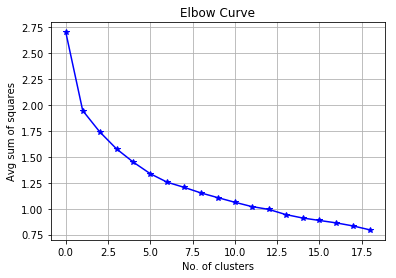

In [122]:
# plot elbow curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(avgWithinSumSquare, 'b*-')
plt.grid(True)
plt.xlabel('No. of clusters')
plt.ylabel('Avg sum of squares')
tt = plt.title('Elbow Curve')

Tomando como referencia el gráfico, buscaremos 6 clusters

### Clustering de los paises en bases a sus indicadores de desarrollo

Algoritmo: K-means

In [123]:
km = KMeans(6, init='k-means++', random_state = 3425) # initialize
km.fit(hpc)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=3425, tol=0.0001, verbose=0)

In [62]:
hpc

array([[ 0.32358057,  2.25063269,  0.62161949, -0.79845776],
       [-1.55687058, -1.04107824,  1.83553096,  0.11374063],
       [-2.51605611, -0.76838707, -1.53678834,  0.93469974],
       [-1.30901434,  1.3048037 , -1.47195555, -0.34722548],
       [ 2.6921884 , -0.10576982, -1.68464323, -0.3780492 ],
       [-2.69026797, -0.67930794, -0.24490005,  0.41662681],
       [-1.81745162, -1.44822807,  0.07688711, -0.46309752],
       [-0.76908909,  1.00459886, -0.21891918, -0.70637815],
       [ 4.22832876, -0.15657465, -1.42472951, -0.05562593],
       [ 0.74051818, -1.01540218,  0.60311004,  0.09570697],
       [ 2.1174244 , -0.3753875 ,  0.78916673,  0.70741163],
       [-0.85419482, -0.50955479, -1.21304202, -0.34655825],
       [ 6.02418873, -1.11475333, -1.67119533,  0.74673303],
       [ 5.51210145, -2.10640044, -1.74782407,  0.74718066],
       [ 3.74573886, -1.68117357, -0.8319057 ,  0.26054203],
       [-1.8206533 ,  0.53130251,  0.42326161, -0.23790696],
       [-1.17136226, -1.

In [124]:
df['countrySegment'] = km.predict(hpc)
df.head()

,tfr,contraception,lifeMale,lifeFemale,infantMortality,GDPperCapita,economicActivityMale,economicActivityFemale,illiteracyMale,illiteracyFemale,countrySegment
2,3.81,52.0,67.5,70.3,44.0,1531.0,76.4,7.8,26.1,51.0,3
8,1.70,22.0,67.2,74.0,25.0,354.0,65.0,52.0,0.3,0.5,0
12,1.95,62.0,70.5,77.1,14.0,12545.0,81.2,67.0,1.5,2.0,5
13,2.97,53.0,71.1,75.3,18.0,9073.0,88.2,29.2,10.9,20.6,2
14,3.14,49.0,58.1,58.2,78.0,280.0,88.8,55.9,50.6,73.9,1


In [125]:
df.groupby('countrySegment').contraception.count()

countrySegment
0    25
1    15
2    24
3    11
4    11
5    11
Name: contraception, dtype: int64

In [126]:
km = [KMeans(6, init='k-means++', random_state = rs) for rs in range(1,10)]
km

[KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=1, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=2, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=3, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=4, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=5, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    

In [127]:
km[8]

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=9, tol=0.0001, verbose=0)

In [67]:
km[2]

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=3, tol=0.0001, verbose=0)

In [129]:
[km[clu].fit(hpc) for clu in range(0,9)]

[KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=1, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=2, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=3, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=4, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=5, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    

Añadimos la variable cluster por cada cluster calculado

In [130]:
df['countrySegment1'] = km[0].predict(hpc)
df['countrySegment2'] = km[1].predict(hpc)
df['countrySegment3'] = km[2].predict(hpc)
df['countrySegment4'] = km[3].predict(hpc)
df['countrySegment5'] = km[4].predict(hpc)
df['countrySegment6'] = km[5].predict(hpc)
df['countrySegment7'] = km[6].predict(hpc)
df['countrySegment8'] = km[7].predict(hpc)
df['countrySegment9'] = km[8].predict(hpc)
df.head()

,tfr,contraception,lifeMale,lifeFemale,infantMortality,GDPperCapita,economicActivityMale,economicActivityFemale,illiteracyMale,illiteracyFemale,countrySegment,countrySegment1,countrySegment2,countrySegment3,countrySegment4,countrySegment5,countrySegment6,countrySegment7,countrySegment8,countrySegment9
2,3.81,52.0,67.5,70.3,44.0,1531.0,76.4,7.8,26.1,51.0,3,3,5,2,2,5,3,2,2,1
8,1.70,22.0,67.2,74.0,25.0,354.0,65.0,52.0,0.3,0.5,0,5,3,4,5,2,0,0,4,5
12,1.95,62.0,70.5,77.1,14.0,12545.0,81.2,67.0,1.5,2.0,5,2,2,0,4,3,5,3,0,2
13,2.97,53.0,71.1,75.3,18.0,9073.0,88.2,29.2,10.9,20.6,2,1,0,5,0,0,2,4,3,3
14,3.14,49.0,58.1,58.2,78.0,280.0,88.8,55.9,50.6,73.9,1,4,1,1,1,1,1,1,1,0


In [131]:
df.groupby('countrySegment').contraception.count()

countrySegment
0    25
1    15
2    24
3    11
4    11
5    11
Name: contraception, dtype: int64

In [132]:
df.groupby('countrySegment1').contraception.count()

countrySegment1
0     9
1    30
2    12
3    12
4    15
5    19
Name: contraception, dtype: int64

In [133]:
df.groupby('countrySegment2').contraception.count()

countrySegment2
0    27
1    15
2    11
3    23
4    10
5    11
Name: contraception, dtype: int64

In [134]:
df.groupby('countrySegment3').contraception.count()

countrySegment3
0    11
1    16
2    12
3     9
4    22
5    27
Name: contraception, dtype: int64

In [74]:
df.groupby('countrySegment').contraception.count()

countrySegment
0    25
1    15
2    24
3    11
4    11
5    11
Name: contraception, dtype: int64

Etiquetamos los clusters obtenidos

In [135]:
clust_map = {
    0:'Cluster0',
    1:'Cluster1',
    2:'Cluster2',
    3:'Cluster3',
    4:'Cluster4',
    5:'Cluster5'
}

df.countrySegment = df.countrySegment.map(clust_map)
df[:10]

,tfr,contraception,lifeMale,lifeFemale,infantMortality,GDPperCapita,economicActivityMale,economicActivityFemale,illiteracyMale,illiteracyFemale,countrySegment,countrySegment1,countrySegment2,countrySegment3,countrySegment4,countrySegment5,countrySegment6,countrySegment7,countrySegment8,countrySegment9
2,3.81,52.0,67.5,70.3,44.0,1531.0,76.4,7.8,26.100,51.000,Cluster3,3,5,2,2,5,3,2,2,1
8,1.70,22.0,67.2,74.0,25.0,354.0,65.0,52.0,0.300,0.500,Cluster0,5,3,4,5,2,0,0,4,5
12,1.95,62.0,70.5,77.1,14.0,12545.0,81.2,67.0,1.500,2.000,Cluster5,2,2,0,4,3,5,3,0,2
13,2.97,53.0,71.1,75.3,18.0,9073.0,88.2,29.2,10.900,20.600,Cluster2,1,0,5,0,0,2,4,3,3
14,3.14,49.0,58.1,58.2,78.0,280.0,88.8,55.9,50.600,73.900,Cluster1,4,1,1,1,1,1,1,1,0
15,1.73,55.0,73.6,78.7,9.0,7173.0,73.4,61.4,2.000,3.200,Cluster0,2,3,4,5,2,0,0,4,5
16,1.40,50.0,64.4,74.8,15.0,994.0,76.4,61.3,0.300,0.600,Cluster0,5,3,4,5,2,0,0,4,5
18,3.66,47.0,73.4,76.1,30.0,2569.0,79.0,34.0,21.252,23.472,Cluster2,1,0,5,0,0,2,4,3,3
19,5.83,16.0,52.4,57.2,84.0,391.0,90.0,57.8,51.300,74.200,Cluster1,4,1,1,1,1,1,1,1,0
21,4.36,45.0,59.8,63.2,66.0,909.0,74.1,56.3,9.500,24.000,Cluster4,0,4,3,3,4,3,5,5,4


Analizamos el PBI vs mortalidad infantil en cada cluster

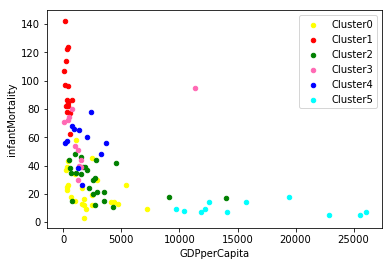

In [136]:
d_color = {
    'Cluster0':'yellow',
    'Cluster1':'red',
    'Cluster2':'green',
    'Cluster3':'hotpink',
    'Cluster4':'blue',
    'Cluster5':'aqua'
}

fig, ax = plt.subplots()
for clust in clust_map.values():
    color = d_color[clust]
    df[df.countrySegment == clust].plot(kind='scatter', x='GDPperCapita', y='infantMortality', label=clust, ax=ax, color=color)
handles, labels = ax.get_legend_handles_labels()
_ = ax.legend(handles, labels, loc="upper right")

Cuando el PBI es bajo la mortalidad infantil es alta.

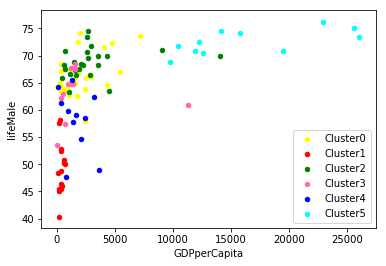

In [137]:
fig, ax = plt.subplots()
for clust in clust_map.values():
    color = d_color[clust]
    df[df.countrySegment == clust].plot(kind='scatter', x='GDPperCapita', y='lifeMale', label=clust, ax=ax, color=color)
handles, labels = ax.get_legend_handles_labels()
_ = ax.legend(handles, labels, loc="lower right")

Esperanza de vida se incrementa mientras el pais está más desarrollado

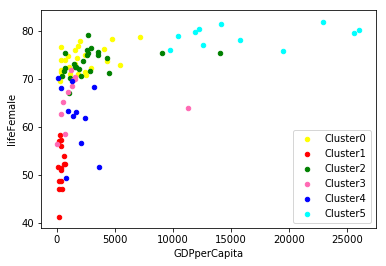

In [78]:
fig, ax = plt.subplots()
for clust in clust_map.values():
    color = d_color[clust]
    df[df.countrySegment == clust].plot(kind='scatter', x='GDPperCapita', y='lifeFemale', label=clust, ax=ax, color=color)
handles, labels = ax.get_legend_handles_labels()
_ = ax.legend(handles, labels, loc="lower right")

Esperanza de vida se incrementa mientras el pais está más desarrollado

In [80]:
km[0].labels_

array([3, 5, 2, 1, 4, 2, 5, 1, 4, 0, 0, 1, 4, 4, 4, 1, 1, 1, 5, 1, 1, 1, 1,
       3, 1, 5, 4, 1, 4, 5, 3, 4, 4, 1, 2, 5, 3, 1, 3, 3, 4, 1, 3, 5, 2, 2,
       5, 5, 5, 4, 1, 0, 1, 1, 5, 3, 0, 0, 4, 2, 3, 4, 3, 1, 1, 5, 1, 2, 2,
       1, 2, 5, 5, 1, 4, 2, 1, 2, 1, 0, 0, 5, 1, 4, 1, 1, 3, 1, 5, 5, 2, 5,
       0, 1, 5, 3, 0])

In [82]:
hpc[2]

array([-2.51605611, -0.76838707, -1.53678834,  0.93469974])

In [84]:
from sklearn import metrics
import numpy as np
from sklearn.cluster import KMeans

#kmeans_model = KMeans(n_clusters=3, randomkm[0]_state=1).fit(X)
labels = km[0].labels_
metrics.silhouette_score(hpc, labels, metric='euclidean')

0.28991760095861552

In [85]:
from sklearn import metrics
import numpy as np
from sklearn.cluster import KMeans

#kmeans_model = KMeans(n_clusters=3, randomkm[0]_state=1).fit(X)
labels = km[1].labels_
metrics.silhouette_score(hpc, labels, metric='euclidean')

0.29241134844019956

In [86]:
from sklearn import metrics
import numpy as np
from sklearn.cluster import KMeans

#kmeans_model = KMeans(n_clusters=3, randomkm[0]_state=1).fit(X)
labels = km[2].labels_
metrics.silhouette_score(hpc, labels, metric='euclidean')

0.28977196462316629

In [87]:
from sklearn import metrics
import numpy as np
from sklearn.cluster import KMeans

#kmeans_model = KMeans(n_clusters=3, randomkm[0]_state=1).fit(X)
labels = km[3].labels_
metrics.silhouette_score(hpc, labels, metric='euclidean')

0.29205773649862521

In [88]:
from sklearn import metrics
import numpy as np
from sklearn.cluster import KMeans

#kmeans_model = KMeans(n_clusters=3, randomkm[0]_state=1).fit(X)
labels = km[4].labels_
metrics.silhouette_score(hpc, labels, metric='euclidean')

0.28083998221604023

In [140]:
df.head()

,tfr,contraception,lifeMale,lifeFemale,infantMortality,GDPperCapita,economicActivityMale,economicActivityFemale,illiteracyMale,illiteracyFemale,countrySegment,countrySegment1,countrySegment2,countrySegment3,countrySegment4,countrySegment5,countrySegment6,countrySegment7,countrySegment8,countrySegment9
2,3.81,52.0,67.5,70.3,44.0,1531.0,76.4,7.8,26.1,51.0,Cluster3,3,5,2,2,5,3,2,2,1
8,1.70,22.0,67.2,74.0,25.0,354.0,65.0,52.0,0.3,0.5,Cluster0,5,3,4,5,2,0,0,4,5
12,1.95,62.0,70.5,77.1,14.0,12545.0,81.2,67.0,1.5,2.0,Cluster5,2,2,0,4,3,5,3,0,2
13,2.97,53.0,71.1,75.3,18.0,9073.0,88.2,29.2,10.9,20.6,Cluster2,1,0,5,0,0,2,4,3,3
14,3.14,49.0,58.1,58.2,78.0,280.0,88.8,55.9,50.6,73.9,Cluster1,4,1,1,1,1,1,1,1,0


In [142]:
df.groupby('countrySegment').contraception.mean()

countrySegment
Cluster0    49.480000
Cluster1    15.666667
Cluster2    57.416667
Cluster3    33.454545
Cluster4    29.545455
Cluster5    62.545455
Name: contraception, dtype: float64

In [143]:
df.groupby('countrySegment').lifeMale.mean()

countrySegment
Cluster0    66.404000
Cluster1    49.193333
Cluster2    68.670833
Cluster3    63.163636
Cluster4    58.136364
Cluster5    72.600000
Name: lifeMale, dtype: float64

In [144]:
df.groupby('countrySegment').GDPperCapita.mean()

countrySegment
Cluster0     2096.360000
Cluster1      348.466667
Cluster2     2942.833333
Cluster3     1898.000000
Cluster4     1617.545455
Cluster5    16419.090909
Name: GDPperCapita, dtype: float64

In [147]:
df.groupby('countrySegment').economicActivityMale.mean()

countrySegment
Cluster0    72.732000
Cluster1    83.193333
Cluster2    82.095833
Cluster3    77.536364
Cluster4    75.645455
Cluster5    73.136364
Name: economicActivityMale, dtype: float64